## 1. Importing Libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Gathering the required data -
### Malbourne Housing data with target variable as price

In [7]:
malb_housing_data = pd.read_csv("melb_data.csv")
malb_housing_data

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


In [8]:
numerical_df = malb_housing_data.select_dtypes(include=["float64", "int64"])
numerical_df

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
0,2,1480000.0,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,-37.79960,144.99840,4019.0
1,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.80790,144.99340,4019.0
2,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.80930,144.99440,4019.0
3,3,850000.0,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,-37.79690,144.99690,4019.0
4,4,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,-37.80720,144.99410,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,4,1245000.0,16.7,3150.0,4.0,2.0,2.0,652.0,NaN,1981.0,-37.90562,145.16761,7392.0
13576,3,1031000.0,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,-37.85927,144.87904,6380.0
13577,3,1170000.0,6.8,3016.0,3.0,2.0,4.0,436.0,NaN,1997.0,-37.85274,144.88738,6380.0
13578,4,2500000.0,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,-37.85908,144.89299,6380.0


In [9]:
# sns.pairplot(numerical_df)
# plt.suptitle("Scatter Matrix of Features", y=1.02)
# plt.show()

In [10]:
malb_housing_data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [11]:
malb_housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

## Handling Categorical features
#### ["Suburb", "Address", "Type", "Method", "SellerG", "Date", "Postcode", "CouncilArea", "Regionname"]

#### 1. Dropping the unnecessary categorical columns
#### 2. Ordinal Encoding
#### 3. One-Hot Encoding

In [12]:
# 1. Dropping the unnecessary categorical columns
dropped_cat = malb_housing_data.select_dtypes(exclude=["object"])
dropped_cat

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
0,2,1480000.0,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,-37.79960,144.99840,4019.0
1,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.80790,144.99340,4019.0
2,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.80930,144.99440,4019.0
3,3,850000.0,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,-37.79690,144.99690,4019.0
4,4,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,-37.80720,144.99410,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,4,1245000.0,16.7,3150.0,4.0,2.0,2.0,652.0,NaN,1981.0,-37.90562,145.16761,7392.0
13576,3,1031000.0,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,-37.85927,144.87904,6380.0
13577,3,1170000.0,6.8,3016.0,3.0,2.0,4.0,436.0,NaN,1997.0,-37.85274,144.88738,6380.0
13578,4,2500000.0,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,-37.85908,144.89299,6380.0


In [13]:
#2. Ordinal Encoding
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()
cat = (malb_housing_data.dtypes == "object")
list_cat = list(cat[cat].index) #List of categorical features
#list_cat

#Fit Transform
data1 = malb_housing_data.copy()
# data1
# Apply Ordinal Encoding over categorical features
data1[list_cat] = ord_enc.fit_transform(data1[list_cat])
data1.info()

#Transform- it's used on test data to correlate with training data-
# suppose you've given encoding of 1 to Washington, 2 to New York by fit transforming- Now when you encode test data it shall have consistent encoding
# eg. 1 for washington, 2 for New york

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  float64
 1   Address        13580 non-null  float64
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  float64
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  float64
 6   SellerG        13580 non-null  float64
 7   Date           13580 non-null  float64
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  float64
 17  Lattitude      13580 non-null  float64
 18  Longti

In [14]:
from sklearn.preprocessing import OneHotEncoder
one_hot_enc = OneHotEncoder(handle_unknown = "ignore", sparse_output = False)
data3=  malb_housing_data.copy()

data3 = pd.DataFrame(one_hot_enc.fit_transform(data3[list_cat]))
data3.head(2)

,0,1,2,3,4,5,6,7,8,9,...,14058,14059,14060,14061,14062,14063,14064,14065,14066,14067
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [15]:
# Decoding the data

decoded = one_hot_enc.inverse_transform(data3)
decoded
decoded_df = pd.DataFrame(decoded, columns=malb_housing_data[list_cat].columns)
decoded_df

,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname
0,Abbotsford,85 Turner St,h,S,Biggin,3/12/2016,Yarra,Northern Metropolitan
1,Abbotsford,25 Bloomburg St,h,S,Biggin,4/02/2016,Yarra,Northern Metropolitan
2,Abbotsford,5 Charles St,h,SP,Biggin,4/03/2017,Yarra,Northern Metropolitan
3,Abbotsford,40 Federation La,h,PI,Biggin,4/03/2017,Yarra,Northern Metropolitan
4,Abbotsford,55a Park St,h,VB,Nelson,4/06/2016,Yarra,Northern Metropolitan
...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,h,S,Barry,26/08/2017,NaN,South-Eastern Metropolitan
13576,Williamstown,77 Merrett Dr,h,SP,Williams,26/08/2017,NaN,Western Metropolitan
13577,Williamstown,83 Power St,h,S,Raine,26/08/2017,NaN,Western Metropolitan
13578,Williamstown,96 Verdon St,h,PI,Sweeney,26/08/2017,NaN,Western Metropolitan


In [18]:
#Trying sparse_output = True (by default) to check the storage saved
one_hot_enc_sparse_true = OneHotEncoder(handle_unknown = "ignore")
data5=  malb_housing_data.copy()

data5 = (one_hot_enc_sparse_true.fit_transform(data5[list_cat]))
#data5

data5_dense = data5.toarray()

#data5_dense

In [19]:

dummy = pd.DataFrame({"a": [1,2,3], "b":[3,2,1]})
dummy


,a,b
0,1,3
1,2,2
2,3,1


In [20]:
from sklearn.model_selection import train_test_split
data = malb_housing_data.copy()
data.head(2)


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0


## Removing Columns having Null values

In [21]:
data.isnull().sum()

,0
Suburb,0
Address,0
Rooms,0
Type,0
Price,0
Method,0
SellerG,0
Date,0
Distance,0
Postcode,0


In [22]:
clean_data = data.dropna(axis = 1)
clean_data

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Landsize,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,202.0,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,156.0,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,134.0,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,94.0,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,120.0,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,4.0,2.0,652.0,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,3.0,2.0,333.0,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,3.0,2.0,436.0,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,4.0,1.0,866.0,-37.85908,144.89299,Western Metropolitan,6380.0


In [23]:
y = clean_data.Price
x = clean_data.drop(["Price"], axis = 1)

In [24]:
X_train_full, X_valid_full, y_train, y_valid = train_test_split(x, y, train_size = 0.8, random_state = 0)

In [25]:
## Cardinality: No of Categories
low_cardinality_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 10 and X_train_full[cname].dtype == "object"]
low_cardinality_cols

['Type', 'Method', 'Regionname']

In [26]:
#Numerical columns
numeric_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtypes in ["int64", "float64"]]
numeric_cols

['Rooms',
 'Distance',
 'Postcode',
 'Bedroom2',
 'Bathroom',
 'Landsize',
 'Lattitude',
 'Longtitude',
 'Propertycount']

In [27]:
# Total useful columns
total_cols = low_cardinality_cols + numeric_cols
total_cols

['Type',
 'Method',
 'Regionname',
 'Rooms',
 'Distance',
 'Postcode',
 'Bedroom2',
 'Bathroom',
 'Landsize',
 'Lattitude',
 'Longtitude',
 'Propertycount']

### Preparing Training Data

In [28]:
X_train = X_train_full[total_cols].copy()
X_train

,Type,Method,Regionname,Rooms,Distance,Postcode,Bedroom2,Bathroom,Landsize,Lattitude,Longtitude,Propertycount
12167,u,S,Southern Metropolitan,1,5.0,3182.0,1.0,1.0,0.0,-37.85984,144.98670,13240.0
6524,h,SA,Western Metropolitan,2,8.0,3016.0,2.0,2.0,193.0,-37.85800,144.90050,6380.0
8413,h,S,Western Metropolitan,3,12.6,3020.0,3.0,1.0,555.0,-37.79880,144.82200,3755.0
2919,u,SP,Northern Metropolitan,3,13.0,3046.0,3.0,1.0,265.0,-37.70830,144.91580,8870.0
6043,h,S,Western Metropolitan,3,13.3,3020.0,3.0,1.0,673.0,-37.76230,144.82720,4217.0
...,...,...,...,...,...,...,...,...,...,...,...,...
13123,h,SP,Northern Metropolitan,3,5.2,3056.0,3.0,1.0,212.0,-37.77695,144.95785,11918.0
3264,h,S,Eastern Metropolitan,3,10.5,3081.0,3.0,1.0,748.0,-37.74160,145.04810,2947.0
9845,h,PI,Northern Metropolitan,4,6.7,3058.0,4.0,2.0,441.0,-37.73572,144.97256,11204.0
10799,h,S,Northern Metropolitan,3,12.0,3073.0,3.0,1.0,606.0,-37.72057,145.02615,21650.0


In [29]:
X_valid = X_valid_full[total_cols].copy()
X_valid

,Type,Method,Regionname,Rooms,Distance,Postcode,Bedroom2,Bathroom,Landsize,Lattitude,Longtitude,Propertycount
8505,h,SP,Western Metropolitan,4,8.0,3016.0,4.0,2.0,450.0,-37.86100,144.89850,6380.0
5523,h,S,Western Metropolitan,2,6.6,3011.0,2.0,1.0,172.0,-37.81000,144.88960,2417.0
12852,h,SP,Western Metropolitan,3,10.5,3020.0,3.0,1.0,581.0,-37.76740,144.82421,4217.0
4818,t,PI,Southern Metropolitan,3,4.5,3181.0,2.0,2.0,128.0,-37.85260,145.00710,7717.0
12812,h,S,Northern Metropolitan,3,8.5,3044.0,3.0,2.0,480.0,-37.72523,144.94567,7485.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2664,u,PI,Western Metropolitan,2,6.4,3011.0,2.0,1.0,47.0,-37.80140,144.89590,7570.0
8513,h,SP,Western Metropolitan,4,8.0,3016.0,4.0,2.0,551.0,-37.85790,144.87860,6380.0
12922,h,S,Eastern Metropolitan,3,10.8,3105.0,3.0,1.0,757.0,-37.78094,145.10131,4480.0
10761,h,S,Western Metropolitan,4,6.2,3039.0,4.0,1.0,478.0,-37.76421,144.90571,6232.0


## Encoding Categorical data

In [30]:
from sklearn.preprocessing import OneHotEncoder
OH_encoder = OneHotEncoder(handle_unknown = "ignore", sparse_output = False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[low_cardinality_cols]))
OH_cols_valid = pd.DataFrame(OH_encoder.transform(X_valid[low_cardinality_cols]))

# Putting back the indexes
OH_cols_train.index= X_train.index
OH_cols_valid.index= X_valid.index

#Removing Categorical Column
num_X_train = X_train.drop(low_cardinality_cols, axis=1)
num_X_valid=X_valid.drop(low_cardinality_cols, axis=1)

#Adding One Hot encoded columns to numerical features
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis = 1)
OH_X_valid = pd.concat([num_X_valid, OH_cols_valid], axis = 1)

#Ensure that all columns have string data
OH_X_train.columns = OH_X_train.columns.astype(str)
OH_X_valid.columns = OH_X_valid.columns.astype(str)

In [31]:
OH_X_train

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Landsize,Lattitude,Longtitude,Propertycount,0,...,6,7,8,9,10,11,12,13,14,15
12167,1,5.0,3182.0,1.0,1.0,0.0,-37.85984,144.98670,13240.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6524,2,8.0,3016.0,2.0,2.0,193.0,-37.85800,144.90050,6380.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8413,3,12.6,3020.0,3.0,1.0,555.0,-37.79880,144.82200,3755.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2919,3,13.0,3046.0,3.0,1.0,265.0,-37.70830,144.91580,8870.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6043,3,13.3,3020.0,3.0,1.0,673.0,-37.76230,144.82720,4217.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,3,5.2,3056.0,3.0,1.0,212.0,-37.77695,144.95785,11918.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3264,3,10.5,3081.0,3.0,1.0,748.0,-37.74160,145.04810,2947.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9845,4,6.7,3058.0,4.0,2.0,441.0,-37.73572,144.97256,11204.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10799,3,12.0,3073.0,3.0,1.0,606.0,-37.72057,145.02615,21650.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## Handling Numeric Features
#### There are two ways of handling missing values
#### 1. Remove missing columns
#### 2. Data Imputation

In [33]:
# Handling missing values
car = pd.read_csv("car 1.csv")
car

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [34]:
car.isnull().sum()

,0
Make,0
Model,0
Year,0
Engine Fuel Type,3
Engine HP,69
Engine Cylinders,30
Transmission Type,0
Driven_Wheels,0
Number of Doors,6
Market Category,3742


In [35]:
# 1. For missing values - cleaning data by using drop methods
car_drop_data = car.dropna(axis=1)
car_drop_data

,Make,Model,Year,Transmission Type,Driven_Wheels,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,AUTOMATIC,all wheel drive,Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,AUTOMATIC,all wheel drive,Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,AUTOMATIC,all wheel drive,Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,AUTOMATIC,all wheel drive,Midsize,4dr Hatchback,23,16,204,50920


In [36]:
data_na = (car.isnull().sum()/len(car))*100
data_na
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending = False)
data_na

,0
Market Category,31.408427
Engine HP,0.579151
Engine Cylinders,0.251805
Number of Doors,0.050361
Engine Fuel Type,0.025180


##### 2. For missing values by filling it by Data Imputation

In [37]:
# Using Groupby method: fill the value in empty cell with similar value in fuel type - group of car of same model - fill the same fuel type

car["Engine Fuel Type"] = car.groupby("Model")["Engine Fuel Type"].transform(lambda x: x.mode()[0] if not x.mode().empty else None)
car["Engine HP"] = car.groupby("Model")["Engine HP"].transform(lambda x: x.fillna(x.mean()))
car["Engine Cylinders"] = car.groupby("Model")["Engine Cylinders"].transform(lambda x: x.fillna(x.mean()))
car["Number of Doors"] = car.groupby("Model")["Number of Doors"].transform(lambda x: x.fillna(x.mean()))

In [38]:
car.isnull().sum()

,0
Make,0
Model,0
Year,0
Engine Fuel Type,0
Engine HP,38
Engine Cylinders,29
Transmission Type,0
Driven_Wheels,0
Number of Doors,0
Market Category,3742


### We see traditional group by method does not completely solve our missing value problem

In [39]:
# Rule Based Imputation:
null_data = car[car["Engine Cylinders"].isnull()]
null_data

#1 Rule - Electric car does not have cylinders, putting 0
car.loc[(car["Engine Cylinders"].isna()) & (car["Engine Fuel Type"] == "electric"), "Engine Cylinders"] = 0

#2 Rule- RX7 and RX8 has 4 cylinders
car.loc[(car["Engine Cylinders"].isna()) & (car["Model"].isin(["RX-7", "RX-8"])), "Engine Cylinders"] = 4


In [40]:
car.isnull().sum()

,0
Make,0
Model,0
Year,0
Engine Fuel Type,0
Engine HP,38
Engine Cylinders,0
Transmission Type,0
Driven_Wheels,0
Number of Doors,0
Market Category,3742


#### Now, Number of Doors does not have missing data
#### This is how case to case basis we can clean the data

# Feature Engineering

### 1. Normalization
### 2. Binning

Notes:
1. Normalization - Converting the numerical values into standard range.
2. Binning - Converting numerical values into buckets of range (Eg. date to month)
3. Converting raw data into usable data for our model building is called feature engineering or feature extraction or data ingestion

In [67]:
data = pd.read_csv("california_housing_train.csv")
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


In [53]:
X = data.drop("median_house_value", axis =1)
y = data["median_house_value"]

from sklearn.preprocessing import StandardScaler, MinMaxScaler

scalar_var = StandardScaler()
X_standard_scaler = pd.DataFrame(scalar_var.fit_transform(X), columns = X.columns)
X_standard_scaler

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,2.619365,-0.671520,-1.079671,1.361695,1.764204,-0.361184,-0.075998,-1.252543
1,2.539569,-0.573264,-0.761872,2.296608,3.230441,-0.261865,-0.099404,-1.081483
2,2.494683,-0.905463,-0.920772,-0.882462,-0.866956,-0.955354,-0.999252,-1.170105
3,2.489696,-0.928857,-1.159121,-0.524186,-0.480230,-0.796793,-0.715774,-0.362600
4,2.489696,-0.961609,-0.682422,-0.545747,-0.506328,-0.701830,-0.622148,-1.026454
...,...,...,...,...,...,...,...,...
16995,-2.342963,2.318265,1.859971,-0.195728,-0.344995,-0.455275,-0.343872,-0.799999
16996,-2.347950,2.369733,0.588774,-0.135174,-0.027073,-0.205236,-0.094203,-0.715727
16997,-2.362912,2.907801,-0.920772,0.015292,-0.019955,-0.161675,-0.117609,-0.446663
16998,-2.362912,2.889085,-0.761872,0.012999,0.029868,-0.114630,-0.060394,-0.997787


In [59]:
# MinMax Scaler

scalar_minmax = MinMaxScaler()
X_minmax_scaler = pd.DataFrame(scalar_minmax.fit_transform(X), columns = X.columns)
X_minmax_scaler

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,1.000000,0.175345,0.274510,0.147885,0.198945,0.028364,0.077454,0.068530
1,0.984064,0.197662,0.352941,0.201608,0.294848,0.031559,0.075974,0.091040
2,0.975100,0.122210,0.313725,0.018927,0.026847,0.009249,0.019076,0.079378
3,0.974104,0.116897,0.254902,0.039515,0.052142,0.014350,0.037000,0.185639
4,0.974104,0.109458,0.372549,0.038276,0.050435,0.017405,0.042921,0.098281
...,...,...,...,...,...,...,...,...
16995,0.008964,0.854410,1.000000,0.058389,0.060987,0.025337,0.060516,0.128081
16996,0.007968,0.866100,0.686275,0.061869,0.081782,0.033381,0.076303,0.139170
16997,0.004980,0.988310,0.313725,0.070515,0.082247,0.034782,0.074823,0.174577
16998,0.004980,0.984060,0.352941,0.070384,0.085506,0.036296,0.078441,0.102054


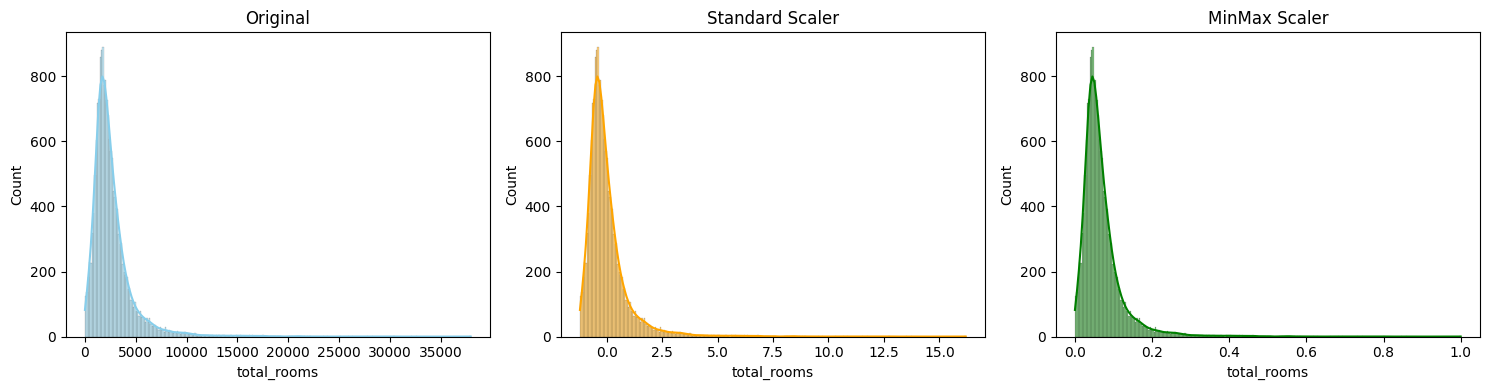

In [62]:
# Set figure size
fig, axes = plt.subplots(1, 3, figsize=(15, 4))  # 1 row, 3 columns

# Original
sns.histplot(data["total_rooms"], ax=axes[0], kde=True, color="skyblue")
axes[0].set_title("Original")

# Standard Scaled
sns.histplot(X_standard_scaler["total_rooms"], ax=axes[1], kde=True, color="orange")
axes[1].set_title("Standard Scaler")

# MinMax Scaled
sns.histplot(X_minmax_scaler["total_rooms"], ax=axes[2], kde=True, color="green")
axes[2].set_title("MinMax Scaler")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [64]:
X.nunique()

,0
longitude,827
latitude,840
housing_median_age,52
total_rooms,5533
total_bedrooms,1848
population,3683
households,1740
median_income,11175


### Binning
It converts Continuous numerical values into categorical bins/Invtervals

### Types of Binning:
1. Equal Width - **pd.cut()**
2. Equal Frequencies - **pd.qcut()**
3. Custom - **pd.cut()**

In [65]:
cols_to_bin = ["median_income", "housing_median_age"]

In [72]:
# Equal width
data["Income_bin_width"] = pd.cut(data["median_income"], bins = 4, labels = ["low", "medium", "high", "very high"])
print(data.Income_bin_width.describe())
print(data.Income_bin_width.value_counts())

bins = pd.cut(data["median_income"], bins=4)
print(bins.cat.categories)

count     17000
unique        4
top         low
freq      10811
Name: Income_bin_width, dtype: object
Income_bin_width
low          10811
medium        5500
high           578
very high      111
Name: count, dtype: int64
IntervalIndex([(0.485, 4.125], (4.125, 7.75], (7.75, 11.375], (11.375, 15.0]], dtype='interval[float64, right]')


In [81]:
# Equal Frequency
data["Income_bin_freq"] = pd.qcut(data["median_income"], q = 4, labels = ["low", "medium", "high", "very high"])
print(data.Income_bin_freq.describe())
print(data.Income_bin_freq.value_counts())

bins_q = pd.qcut(data["median_income"], q=4)
print(bins_q.cat.categories)

count      17000
unique         4
top       medium
freq        4251
Name: Income_bin_freq, dtype: object
Income_bin_freq
medium       4251
low          4250
very high    4250
high         4249
Name: count, dtype: int64
IntervalIndex([(0.499, 2.566], (2.566, 3.545], (3.545, 4.767], (4.767, 15.0]], dtype='interval[float64, right]')


In [79]:
# Custom Range bins
bins = [0, 2, 4, 6, 8, 10]
data["Income_bin_width"] = pd.cut(data["median_income"],bins = bins, labels = ["very low", "low", "medium", "high", "very high"])
print(data.Income_bin_width.describe())
print(data.Income_bin_width.value_counts())

count     16741
unique        5
top         low
freq       8281
Name: Income_bin_width, dtype: object
Income_bin_width
low          8281
medium       4721
very low     2023
high         1386
very high     330
Name: count, dtype: int64


In [84]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
data["Income_bin_encoded"] = LE.fit_transform(data["Income_bin_freq"])
print(LE.classes_)

['high' 'low' 'medium' 'very high']


In [83]:
data.Income_bin_encoded.value_counts()

,count
Income_bin_encoded,
2,4251
1,4250
3,4250
0,4249


## PCA Algorithm - Dimension Reduction Algorithm